# $\textcolor{0,105,175}{\text{Exercise Solutions:}}$

## $\textcolor{0,105,175}{Conceptual}$

### $\text{1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.}$

#### $\text{(a) The sample size ( n ) is extremely large, and the number of predictors ( p ) is small.}$

**$\text{Scenario:}$**
$\text{Sample size ( n ) is extremely large, and predictors ( p ) are few.}$

**$\text{Answer:}$**
$\text{Better with flexible method.}$

**$\text{Justification:}$**
- $\text{Large ( n ) provides enough data to capture complex patterns without overfitting.}$
- $\text{Low ( p ) minimizes the curse of dimensionality.}$
- **$\text{Examples:}$** $\text{Random Forests or Neural Networks would outperform Linear Regression here.}$

---

#### $\text{(b) The number of predictors ( p ) is extremely large, and the number of observations ( n ) is small.}$

**$\text{Scenario:}$**
$\text{Extremely large ( p ), small ( n ).}$
**$\text{Answer:}$**
$\text{Worse with flexible method.}$

**Justification:**
- High-dimensional data ( p / n ) causes overfitting.
- Inflexible methods with regularization (e.g., Lasso/Ridge) work better.
- Flexible methods like SVM would struggle with sparse data.

---

#### (c) The relationship between the predictors and response is highly non-linear.

**Scenario:**
Highly non-linear relationship.

**Answer:**
Better with flexible method.

**Justification:**
- Flexible methods (e.g., Polynomial Regression, GAMs) can model non-linearities.
- Inflexible methods (e.g., Linear Regression) make incorrect parametric assumptions.

---

### (d) The variance of the error terms, i.e., $\sigma^2 = \text{Var}(\epsilon)$, is extremely high.

**Scenario:**
High error variance ($\sigma^2$).

**Answer:**
Worse with flexible method.

**Justification:**
- High noise dominates the signal in the data.
- Flexible methods overfit to noise (i.e., they "chase the outliers").
- Simple models (e.g., Linear Regression) are more robust to noise.
- **Bias-Variance Tradeoff visualization:**
  Flexible methods lead to higher variance but lower bias, while simpler models are less affected by noise and maintain a lower variance.

### 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

#### (a) We collect a set of data on the top 500 firms in the US. For each firm, we record profit, number of employees, industry, and the CEO's salary. We are interested in understanding which factors affect CEO salary.

**Scenario:**
Analyze factors affecting CEO salary using data from 500 firms.

- **Problem Type:**
  Regression
  *Reason:* CEO salary is a continuous numerical outcome.

- **Focus:**
  Inference
  *Reason:* The goal is to understand relationships ("which factors affect"), not predict salaries.

- **Dimensions:**
  - $n = 500$ (firms)
  - $p = 3$ (profit, number of employees, industry)
  *Note:* Industry may expand to multiple dummy variables if categorical, but counted as 1 predictor here.

---

#### (b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product, we have recorded whether it was a success or failure, the price charged for the product, the marketing budget, competition price, and ten other variables.

**Scenario:**
Predict product success/failure using historical data from 20 products.

- **Problem Type:**
  Classification
  *Reason:* Outcome is binary (success/failure).

- **Focus:**
  Prediction
  *Reason:* The goal is to classify future products as success or failure.

- **Dimensions:**
  - $n = 20$ (products)
  - $p = 13$ (price, marketing budget, competition price + 10 other variables)

---

#### (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in world stock markets. Hence, we collect weekly data for all of 2012. For each week, we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

**Scenario:**
Predict USD/Euro exchange rate % change using weekly market data.

- **Problem Type:**
  Regression
  *Reason:* Outcome (% change) is continuous.

- **Focus:**
  Prediction
  *Reason:* The goal is to forecast future exchange rates.

- **Dimensions:**
  - $n = 52$ (weeks in 2012)
  - $p = 3$ (% changes in US, British, and German markets)


### 3. We now revisit the bias-variance decomposition

#### (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

##### Below is a code-generated approximation of the bias-variance tradeoff curves. Flexibility increases along the x-axis, and error values are on the y-axis.

##### Note: The numbers mentioned are hypothetical in order to visually draw the example.

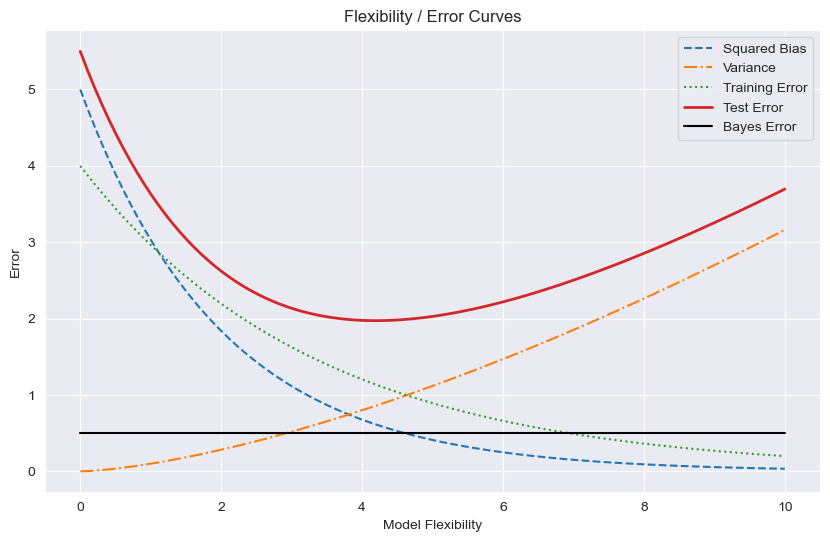

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate flexibility range
flexibility = np.linspace(0, 10, 100)

# Define curves (functional approximations)
bias_squared = 5 * np.exp(-0.5 * flexibility)  # Decreases exponentially
variance = 0.1 * flexibility ** 1.5            # Increases with flexibility
training_error = 4 * np.exp(-0.3 * flexibility) # Decreases with flexibility
test_error = bias_squared + variance + 0.5     # U-shaped (bias² + variance + irreducible error)
bayes_error = np.full_like(flexibility, 0.5)    # Constant line

plt.figure(figsize=(10, 6))
plt.plot(flexibility, bias_squared, label='Squared Bias', linestyle='--')
plt.plot(flexibility, variance, label='Variance', linestyle='-.')
plt.plot(flexibility, training_error, label='Training Error', linestyle=':')
plt.plot(flexibility, test_error, label='Test Error', linewidth=2)
plt.plot(flexibility, bayes_error, label='Bayes Error', linestyle='-', color='black')

plt.xlabel("Model Flexibility")
plt.ylabel("Error")
plt.title("Flexibility / Error Curves")
plt.legend()
plt.grid(True)
plt.show()

#### (b) Explain why each of the five curves has the shape displayed in part (a)

1. **Squared Bias (Decreasing Curve):**
   - **Why it decreases:**
     Less flexible methods (e.g., linear regression) make strong assumptions about the data, leading to high bias. As flexibility increases (e.g., polynomial regression, decision trees), models better approximate the true underlying relationship, reducing bias.

2. **Variance (Increasing Curve):**
   - **Why it increases:**
     Inflexible methods have low variance because they are robust to changes in training data. Flexible methods (e.g., deep neural networks) adapt too closely to training data noise, causing high variance.

3. **Training Error (Decreasing Curve):**
   - **Why it decreases:**
     More flexible models minimize training error by memorizing data (overfitting). At maximum flexibility, training error approaches zero.

4. **Test Error (U-Shaped Curve):**
   - **Why U-shaped:**
     Initially, increasing flexibility reduces bias faster than variance increases, lowering test error. Beyond optimal flexibility, variance dominates, causing test error to rise.

5. **Bayes Error (Constant Line):**
   - **Why constant:**
     Represents irreducible error from noise in the data. No model can reduce this error, regardless of flexibility.

---

**Key Insight:**
- The goal is to find the flexibility level where test error is minimized (the "sweet spot" in the U-shaped curve).
- Overfitting occurs when the gap between training and test error grows large due to high variance.


### 4. You will now think of some real-life applications for statistical learning

#### (a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**1. Email Spam Detection**
- **Response:** Binary label (spam/ham)
- **Predictors:** Email text (word frequencies), sender domain, presence of links
- **Goal:** Prediction
  *Reason:* The goal is to automatically filter spam emails based on predictors.

**2. Medical Diagnosis**
- **Response:** Disease presence (e.g., diabetes: yes/no)
- **Predictors:** Blood pressure, BMI, age, genetic markers
- **Goal:** Both
  *Reason:* Prediction is used to diagnose a disease, and inference helps identify the risk factors for developing the disease.

**3. Credit Risk Assessment**
- **Response:** Loan default risk (high/medium/low)
- **Predictors:** Credit score, income, employment history
- **Goal:** Prediction
  *Reason:* The goal is to predict whether a loan applicant will default on a loan.

---

#### (b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**1. House Price Prediction**
- **Response:** Sale price (continuous)
- **Predictors:** Square footage, location, number of bedrooms
- **Goal:** Prediction
  *Reason:* The goal is to predict the price of a house based on its features.

**2. Energy Demand Forecasting**
- **Response:** Megawatt-hours consumed
- **Predictors:** Temperature, time of day, population density
- **Goal:** Prediction
  *Reason:* The goal is to predict energy consumption to manage the grid efficiently.

**3. Drug Efficacy Analysis**
- **Response:** Reduction in symptom severity (%)
- **Predictors:** Dosage, patient age, genetic profile
- **Goal:** Inference
  *Reason:* The goal is to infer the effectiveness of different drug dosages based on the predictors.

---

#### (c) Describe three real-life applications in which cluster analysis might be useful

**1. Customer Segmentation**
- **Goal:** Group customers by purchasing behavior
- **Predictors:** Purchase frequency, product preferences, spending amount
- **Use Case:** Targeted marketing campaigns

**2. Image Segmentation**
- **Goal:** Group pixels into regions (e.g., objects in a photo)
- **Predictors:** Pixel color, texture, brightness
- **Use Case:** Computer vision (self-driving cars)

**3. Document Topic Clustering**
- **Goal:** Organize articles by topic
- **Predictors:** Keywords, TF-IDF scores, authorship
- **Use Case:** News recommendation systems

---

**Visualization: Classification vs. Regression vs. Clustering**

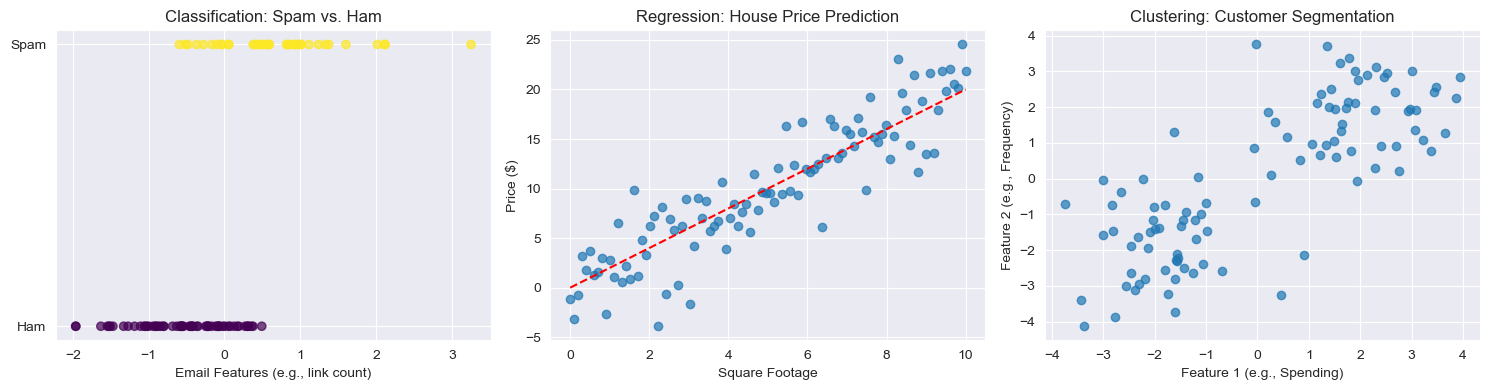

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 4))

# Classification Example
plt.subplot(1, 3, 1)
x = np.random.randn(100)
y = (x + 0.5*np.random.randn(100)) > 0
plt.scatter(x, y, c=y, cmap='viridis', alpha=0.7)
plt.title("Classification: Spam vs. Ham")
plt.xlabel("Email Features (e.g., link count)")
plt.yticks([0, 1], ["Ham", "Spam"])

# Regression Example
plt.subplot(1, 3, 2)
x = np.linspace(0, 10, 100)
y = 2*x + np.random.randn(100)*3
plt.scatter(x, y, alpha=0.7)
plt.plot(x, 2*x, color='red', linestyle='--', label="True Relationship")
plt.title("Regression: House Price Prediction")
plt.xlabel("Square Footage")
plt.ylabel("Price ($)")

# Clustering Example
plt.subplot(1, 3, 3)
x = np.concatenate([np.random.randn(50, 2) + [2, 2], np.random.randn(50, 2) + [-2, -2]])
plt.scatter(x[:, 0], x[:, 1], alpha=0.7)
plt.title("Clustering: Customer Segmentation")
plt.xlabel("Feature 1 (e.g., Spending)")
plt.ylabel("Feature 2 (e.g., Frequency)")

plt.tight_layout()
plt.show()

### 5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

### Advantages and Disadvantages of Flexible vs Inflexible Methods

**Flexible Methods (e.g., Neural Networks, Splines, GAMs):**

- **Advantages:**
  1. Can model complex non-linear relationships.
  2. Higher potential accuracy with sufficient data.
  3. Automatically detect interactions between predictors.

- **Disadvantages:**
  1. Prone to overfitting (high variance).
  2. Computationally expensive.
  3. Difficult to interpret ("black box").

---

**Less Flexible Methods (e.g., Linear Regression, Logistic Regression):**

- **Advantages:**
  1. Computational efficiency.
  2. Interpretability (clear coefficient relationships).
  3. Less prone to overfitting (low variance).

- **Disadvantages:**
  1. High bias if true relationship is complex.
  2. Cannot capture non-linear patterns.
  3. Limited predictive power for intricate data.

---

### When to Prefer Flexible Methods:
1. **Large datasets** ($n \gg p$) where overfitting risk is minimized.
2. **Complex relationships** (e.g., image recognition, natural language processing).
3. **Prediction-focused tasks** where accuracy trumps interpretability.

---

### When to Prefer Less Flexible Methods:
1. **Small datasets** ($p \approx n$) to avoid overfitting.
2. **Inference-focused tasks** where understanding variable relationships is critical.
3. **Simple linear relationships** (e.g., medical studies with known linear effects).

**Key Takeaways:**
- Flexible methods are preferred when the **signal-to-noise ratio is high** and **data is abundant**.
- Less flexible methods excel when **interpretability matters** or the **true relationship is simple**.
- The optimal approach often lies in balancing flexibility with regularization (e.g., ridge regression, pruning).

### 6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

### Key Differences

**Parametric Methods (e.g., Linear Regression, Logistic Regression):**
- Assume a **fixed functional form** (e.g., linear, polynomial) defined by a finite set of parameters.
- Model complexity is **independent of data size** (number of parameters is fixed).

**Non-Parametric Methods (e.g., Decision Trees, K-Nearest Neighbors):**
- **No strong assumptions** about functional form; shape is determined by the data.
- Model complexity **grows with data size** (e.g., more splits in trees, more neighbors in KNN).

---

### Advantages of Parametric Approaches

1. **Computational Efficiency:**
   - Fewer parameters to estimate → faster training.
   - **Example:** Linear regression solves in closed form $\hat{\beta} = (X^TX)^{-1}X^Ty$.

2. **Interpretability:**
   - Clear relationships (e.g., coefficients in linear models).

3. **Data Efficiency:**
   - Work well with small datasets ($n \leq p$) if assumptions hold.

4. **Less Overfitting Risk:**
   - Constrained structure reduces variance (if model assumptions are correct).

---

### Disadvantages of Parametric Approaches

1. **Model Misspecification:**
   - Poor performance if the assumed form is incorrect (e.g., fitting a linear model to exponential data).

2. **High Bias:**
   - Inflexibility leads to systematic errors in complex relationships.

3. **Limited Expressiveness:**
   - Cannot capture interactions/non-linearities unless explicitly modeled.

### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

![Data Set](e7.png)

### Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$

### Compute Euclidean Distances
**Test Point:** ( ($X_1$, $X_2$, $X_3$) = ($0$, $0$, $0$) )

Euclidean Distance Formula:
$\[ \text{Distance} = \sqrt{X_1^2 + X_2^2 + X_3^2} \]$

| Obs. | Distance Calculation                         | Distance Value |
|------|----------------------------------------------|----------------|
| 1    | $\sqrt{0^2 + 3^2 + 0^2}$               | 3.00           |
| 2    | $\sqrt{2^2 + 0^2 + 0^2}$               | 2.00           |
| 3    | $\sqrt{0^2 + 1^2 + 3^2} = \sqrt{10}$   | 3.16           |
| 4    | $\sqrt{0^2 + 1^2 + 2^2} = \sqrt{5}$    | 2.24           |
| 5    | $\sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{2}$ | 1.41         |
| 6    | $\sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$    | 1.73           |

---

#### (b) What is our prediction with $K = 1$? Why?

### Prediction with $K = 1$
- **Nearest Observation:** Observation 5 (Distance = 1.41)
- **Class of Observation 5:** Green
- **Prediction:** Green

**Why?** With $K = 1$, the algorithm uses only the closest neighbor to make the prediction.

---

#### (c) What is our prediction with $K = 3$? Why?

### Prediction with $K = 3$
- **3 Nearest Observations:**
  1. Observation 5 (Green)
  2. Observation 6 (Red)
  3. Observation 2 (Red)
- **Majority Vote:** 2 Red, 1 Green
- **Prediction:** Red

**Why?** The prediction is determined by the majority vote among the 3 nearest neighbors.

---

#### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for $K$ to be large or small? Why?

### Best $K$ for Nonlinear Bayes Boundary
- **Answer:** Small $K$
- **Reason:**
  - A nonlinear decision boundary implies complex local patterns.
  - Smaller $K$ captures fine-grained structures and is more flexible.
  - Larger $K$ smooths over data, making the model less flexible and more likely to behave like a linear model.

## Applied

### 8. This exercise relates to the College data set, which can be found in the file **College.csv** on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

- <span style="color: rgb(145, 75, 40);">Private</span>: Public/private indicator
- <span style="color: rgb(145, 75, 40);">Apps</span>: Number of applications received
- <span style="color: rgb(145, 75, 40);">Accept</span>: Number of applicants accepted
- <span style="color: rgb(145, 75, 40);">Enroll</span>: Number of new students enrolled
- <span style="color: rgb(145, 75, 40);">Top10perc</span>: New students from the top 10% of high school class
- <span style="color: rgb(145, 75, 40);">Top25perc</span>: New students from the top 25% of high school class
- <span style="color: rgb(145, 75, 40);">F.Undergrad</span>: Number of full-time undergraduates
- <span style="color: rgb(145, 75, 40);">P.Undergrad</span>: Number of part-time undergraduates
- <span style="color: rgb(145, 75, 40);">Outstate</span>: Out-of-state tuition
- <span style="color: rgb(145, 75, 40);">Room.Board</span>: Room and board costs
- <span style="color: rgb(145, 75, 40);">Books</span>: Estimated book costs
- <span style="color: rgb(145, 75, 40);">Personal</span>: Estimated personal spending
- <span style="color: rgb(145, 75, 40);">PhD</span>: Percent of faculty with Ph.D.s
- <span style="color: rgb(145, 75, 40);">Terminal</span>: Percent of faculty with terminal degree
- <span style="color: rgb(145, 75, 40);">S.F.Ratio</span>: Student/faculty ratio
- <span style="color: rgb(145, 75, 40);">perc.alumni</span>: Percent of alumni who donate
- <span style="color: rgb(145, 75, 40);">Expend</span>: Instructional expenditure per student
- <span style="color: rgb(145, 75, 40);">Grad.Rate</span>: Graduation rate

#### Before reading the data into Python, it can be viewed in Excel or a text editor.

#### (a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data

In [6]:
import pandas as pd
college = pd.read_csv("College.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'College.csv'

#### (b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [7]:
college2 = pd.read_csv('College.csv', index_col =0)
college3 = college.rename ({'Unnamed: 0': 'College'},axis =1)
college3 = college3.set_index('College')

FileNotFoundError: [Errno 2] No such file or directory: 'College.csv'

#### This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by dictionary (key, value) pairs. Keep your modified version of the data with the following:

In [8]:
college = college3

NameError: name 'college3' is not defined

#### (c) Use the describe() method of to produce a numerical summary of the variables in the data set

In [9]:
college.describe()

NameError: name 'college' is not defined

#### (d) Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C]

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.clf()
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])
plt.show()

NameError: name 'college' is not defined

#### (e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private

In [11]:
import seaborn as sns
plt.clf()
sns.boxplot(x='Private', y='Outstate', data=college);
plt.show()

NameError: name 'college' is not defined

#### (f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%

In [12]:
college['Elite'] = pd.cut(college['Top10perc'],[0 ,50,100] ,labels =['No', 'Yes'])

NameError: name 'college' is not defined

#### Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite

In [13]:
college["Elite"].value_counts()

NameError: name 'college' is not defined

In [14]:
plt.clf() #Cleaning plot variable for the next plot
sns.boxplot(x='Elite', y='Outstate', data=college);
plt.show()

NameError: name 'college' is not defined

#### (g) Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations

In [15]:
# Bins creation
college['PhD'] = pd.cut(college['PhD'], 3, labels=['Low', 'Medium', 'High'])
college['Grad.Rate'] = pd.cut(college['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college['Books'] = pd.cut(college['Books'], 2, labels=['Low', 'High'])
college['Enroll'] = pd.cut(college['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])

NameError: name 'college' is not defined

In [16]:
# Plot histograms
plt.clf()
fig = plt.figure()

plt.subplot(221)
college['PhD'].value_counts().plot(kind='bar', title = 'Private');
plt.subplot(222)
college['Grad.Rate'].value_counts().plot(kind='bar', title = 'Grad.Rate');
plt.subplot(223)
college['Books'].value_counts().plot(kind='bar', title = 'Books');
plt.subplot(224)
college['Enroll'].value_counts().plot(kind='bar', title = 'Enroll');

fig.subplots_adjust(hspace=1) # To add space between
plt.show()

NameError: name 'college' is not defined

#### (g) Continue exploring the data, and provide a brief summary of what you discover
##### The answer depends on you

### 9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data

#### (a) Which of the predictors are quantitative, and which are qualitative?

In [17]:
from ISLP import load_data
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [18]:
Auto.isnull().sum() #Check if there is null value in the data

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [19]:
Auto.nunique() #Number of unique values for each column

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
dtype: int64

##### cylinders, year and origin can be accepted as qualitative (categorical) because the number of unique value in these columns are not so much.

In [20]:
qualitative_columns = ["cylinders","year","origin"]

In [21]:
Auto[qualitative_columns]

,cylinders,year,origin
name,,,
chevrolet chevelle malibu,8,70,1
buick skylark 320,8,70,1
plymouth satellite,8,70,1
amc rebel sst,8,70,1
ford torino,8,70,1
...,...,...,...
ford mustang gl,4,82,1
vw pickup,4,82,2
dodge rampage,4,82,1


In [22]:
Auto.drop(columns=qualitative_columns)

,mpg,displacement,horsepower,weight,acceleration
name,,,,,
chevrolet chevelle malibu,18.0,307.0,130,3504,12.0
buick skylark 320,15.0,350.0,165,3693,11.5
plymouth satellite,18.0,318.0,150,3436,11.0
amc rebel sst,16.0,304.0,150,3433,12.0
ford torino,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
ford mustang gl,27.0,140.0,86,2790,15.6
vw pickup,44.0,97.0,52,2130,24.6
dodge rampage,32.0,135.0,84,2295,11.6


#### (b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy

In [48]:
pd.DataFrame([Auto.drop(columns=qualitative_columns).min(), Auto.drop(columns=qualitative_columns).max()])

,mpg,displacement,horsepower,weight,acceleration
0,9.0,68.0,46.0,1613.0,8.0
1,46.6,455.0,230.0,5140.0,24.8


##### Min and Max value of columns are given above

In [49]:
pd.DataFrame([Auto.drop(columns=qualitative_columns).max() - Auto.drop(columns=qualitative_columns).min()])

,mpg,displacement,horsepower,weight,acceleration
0,37.6,387.0,184.0,3527.0,16.8


##### Max - Min will give us the range

#### (c) What is the mean and standard deviation of each quantitative predictor?

In [50]:
Auto.drop(columns=qualitative_columns).describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [51]:
auto_removed = Auto.drop(Auto.index[10:85])

In [52]:
auto_removed.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,25.006028,5.283688,180.120567,99.039007,2884.939716,15.713121,77.482270,1.631206
std,7.921384,1.637315,96.164263,34.197280,793.236373,2.601575,3.017394,0.830138
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.500000,70.000000,1.000000
25%,18.125000,4.000000,98.000000,74.250000,2188.500000,14.000000,75.000000,1.000000
50%,24.500000,4.000000,140.000000,90.000000,2715.500000,15.500000,78.000000,1.000000
75%,31.000000,6.000000,250.000000,112.000000,3435.250000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4952.000000,24.600000,82.000000,3.000000


#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings

<Figure size 640x480 with 0 Axes>

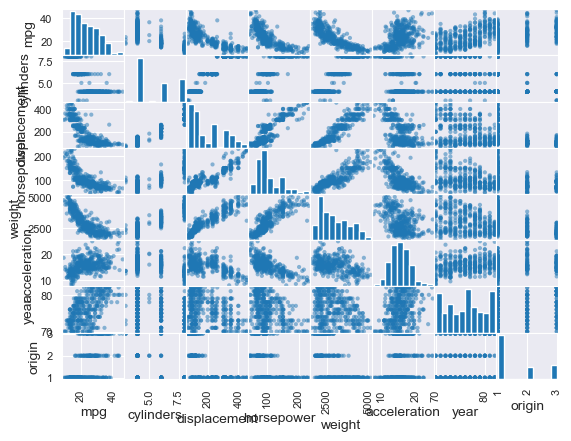

In [53]:
plt.clf()
pd.plotting.scatter_matrix(Auto)
plt.show()

#### (g) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [54]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##### Predictors such as Weight and Displacement seems quite related with mpg, while Acceleration, Year and Origin seems less associated (In terms of linear relationship, for non-linear relationships, we need to apply different approaches.).

### 10. This exercise involves the Boston housing data set

#### (a) To begin, load in the Boston data set, which is part of the ISLP library

In [55]:
Boston = load_data("Boston") #ISLP package contains the samples in the coursebook. From now on, I will use the data in the package.

#### (b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [59]:
print("Number of rows: ", Boston.shape[0])
print("Number of cols: ", Boston.shape[1])

Number of rows:  506
Number of cols:  13


##### Rows represent the each observation, while Columns are the predictors (parameters, information) that is about the observation.

#### (c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings

<Figure size 640x480 with 0 Axes>

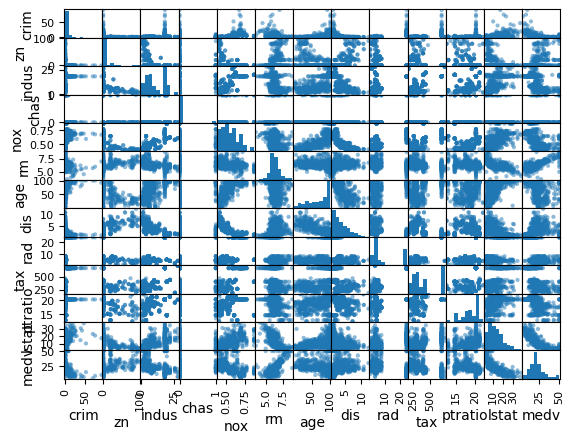

In [171]:
plt.clf()
pd.plotting.scatter_matrix(Boston)
plt.show()

#### Each cell represents the 2d graph by using ith and jth column. These plots can be helpful by visually understanding the relationships between two paired parameters.

#### (d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

##### To be able to understand the predictor - crime rate association, we can look at the plots above and try to appear that if there is a pattern between them (E.g. If there is a diagonal distribution in the plot, then that predictor has positive or negative linear association with crime rate). Or we can check the correlation map in order to get an insight.

In [60]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


##### It seems that rad has the best (in terms of magnitude) linear relation with crime rate.

#### (e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

In [61]:
tmp_Boston = Boston[["crim","tax","ptratio"]]

In [65]:
tmp_Boston.sort_values(["crim"], ascending=False) #Sort by crime rate, descending way.

,crim,tax,ptratio
380,88.97620,666,20.2
418,73.53410,666,20.2
405,67.92080,666,20.2
410,51.13580,666,20.2
414,45.74610,666,20.2
...,...,...,...
55,0.01311,226,17.9
341,0.01301,284,15.5
285,0.01096,300,15.3
284,0.00906,285,15.3


##### Suburb 380, 418, 405, and 410 has +50% crime rate which is very high. Following tables show the tax and pupil-teacher rate of the suburbs with a descending way

In [66]:
tmp_Boston.sort_values(["tax"], ascending=False)

,crim,tax,ptratio
492,0.11132,711,20.1
491,0.10574,711,20.1
490,0.20746,711,20.1
489,0.18337,711,20.1
488,0.15086,711,20.1
...,...,...,...
121,0.07165,188,19.1
120,0.06899,188,19.1
125,0.16902,188,19.1
124,0.09849,188,19.1


In [67]:
tmp_Boston.sort_values(["ptratio"], ascending=False)

,crim,tax,ptratio
354,0.04301,334,22.0
355,0.10659,334,22.0
135,0.55778,437,21.2
127,0.25915,437,21.2
136,0.32264,437,21.2
...,...,...,...
267,0.57834,264,13.0
268,0.54050,264,13.0
197,0.04666,329,12.6
198,0.03768,329,12.6


#### (f) How many of the suburbs in this data set bound the Charles river?

In [69]:
print("There are: ", Boston[Boston["chas"]==1].shape[0], " suburbs that is bound the Charles river")

There are:  35  suburbs that is bound the Charles river


#### (g) What is the median pupil-teacher ratio among the towns in this data set?

In [70]:
Boston[["ptratio"]].median()

ptratio    19.05
dtype: float64

##### Median value of pupil-teacher rate is 19.05

#### (h) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings

In [202]:
Boston[Boston["medv"]==Boston["medv"].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


##### Suburb 398 and 405 has the lowest median value of owner - occupied homes

In [71]:
Boston["medv"].idxmin()

398

##### We will continue with the Suburb 398 to make the answer simple.

In [72]:
describe = Boston.describe()
describe.loc["Range"] = Boston.max() - Boston.min()
describe.loc["Idx-398"] = Boston.loc[398]
describe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
Range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,36.240000,45.000000
Idx-398,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,30.590000,5.000000


##### Comparison between Suburb 398 and Boston data is above.

#### (i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [73]:
print("The number of the suburbs average more than seven rooms per dwelling is: ",Boston[Boston["rm"]>7].shape[0])

The number of the suburbs average more than seven rooms per dwelling is:  64


In [74]:
print("The number of the suburbs average more than seven rooms per dwelling is: ",Boston[Boston["rm"]>8].shape[0])

The number of the suburbs average more than seven rooms per dwelling is:  13


In [75]:
Boston[Boston["rm"]>8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


##### Insights about the suburbs that rooms per dwelling is more than 8

In [76]:
mean_more8 = Boston[Boston["rm"]>8].describe().loc["mean"]
mean_more8

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
lstat        4.310000
medv        44.200000
Name: mean, dtype: float64

In [77]:
mean_general = Boston.describe().loc["mean"]
mean_general

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
lstat       12.653063
medv        22.532806
Name: mean, dtype: float64

In [231]:
comparison = (mean_more8 < mean_general).replace({True: '<', False: '>'})
comparison

crim       <
zn         >
indus      <
chas       >
nox        <
rm         >
age        >
dis        <
rad        <
tax        <
ptratio    <
lstat      <
medv       >
Name: mean, dtype: object

##### "<" states that the mean insight about a parameter for the suburbs specified above is lower than overall suburb mean. ">" states that the mean insight about a parameter for the suburbs specified above is higher than overall suburb mean.